# Slicer Fiducial Transform Application

In [187]:
from slicerfiducials import SlicerFiducials, Space
import SimpleITK as sitk
from matplotlib import pyplot as plt
import numpy as np
from itkwidgets import view
import itk
from math import pi

Read in fiducials and image

In [188]:
fiducials = SlicerFiducials(fcsv_filename='./fids.fcsv', image_filename='./MRHead.nrrd')
image = sitk.ReadImage('./MRHead.nrrd')

In [189]:
ind_of_F1 = np.round(fiducials.query('F-1', space=Space.INDEX)).astype(int)
ind_of_F2 = np.round(fiducials.query('F-2', space=Space.INDEX)).astype(int)
ind_of_F1, ind_of_F2

(array([ 57, 138,  93]), array([ 55, 137,  42]))

In [190]:
def show_lmk_slice(img, index):
    plt.imshow(sitk.GetArrayFromImage(img[int(index[0]),:,:]),cmap='gray')

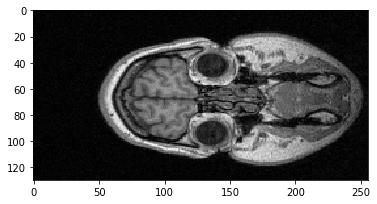

In [191]:
show_lmk_slice(image, ind_of_F1)

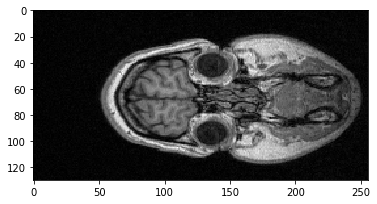

In [192]:
show_lmk_slice(image, ind_of_F2)

In [193]:
def deg_to_rad(x):
    return (pi/180)*x

In [194]:
euler = sitk.Euler3DTransform()
x, y, z = map(deg_to_rad, [0, 70, 0])
euler.SetRotation(x,y,z)
center_voxel = [int(i) for i in np.array(image.GetSize())//2]
euler.SetCenter(image.TransformIndexToPhysicalPoint(center_voxel))

In [195]:
rotated_image = sitk.Resample(image, euler)
fiducials.apply_sitk_transform(euler.GetInverse())

In [184]:
ind_of_F1 = np.round(fiducials.query('F-1', space=Space.INDEX)).astype(int)
ind_of_F2 = np.round(fiducials.query('F-2', space=Space.INDEX)).astype(int)
ind_of_F1, ind_of_F2

(array([135, 114,  93]), array([136, 112,  42]))

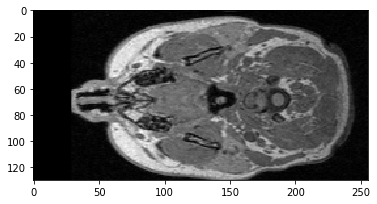

In [196]:
show_lmk_slice(rotated_image, ind_of_F1)

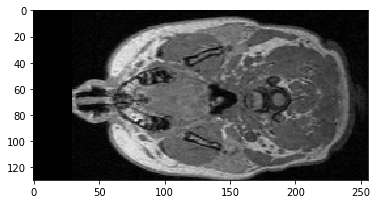

In [197]:
show_lmk_slice(rotated_image, ind_of_F2)